<H2  ALIGN="CENTER"><B><FONT COLOR="#030856">
Optimizing canal networks for flood mitigation
</FONT></B></H2>

## Introduction

In Thailand, the city of Bangkok was once known as Venice of the 
East, because of the numerous canals and waterways that 
covered the entire city.  Bangkok's canal network consists 
of hundreds of kilometers of waterways that were historically 
used for a variety of purposes, including trade, transportation, 
irrigation, drainage, and more.  Some of these uses continue 
to be critically important to this day.  One example is drainage 
of flood waters.


<TABLE ALIGN="CENTER" WIDTH="100%" BORDER="0"  CELLSPACING="0"  CELLPADDING="8">
  <TR VALIGN="TOP">
    <TD ALIGN="CENTER">
      <A HREF="./bkk_canal_network1.png">
          <IMG SRC="./bkk_canal_network1.png" width="100%"></IMG>
        </A>
    </TD>
    <TD ALIGN="CENTER">
      <A HREF="./bkk_canal_network2.png">
          <IMG SRC="./bkk_canal_network2.png" width="100%"></IMG>
      </A>
    </TD>
    <TD ALIGN="CENTER">
        <A HREF="./bkk_canal_network3.png">
            <IMG SRC="./bkk_canal_network3.png" width="100%"></IMG>
        </A>
    </TD>
  </TR>
  <TR>
      <TD COLSPAN="3" ALIGN="CENTER">
          Images courtesy of <I>Bangkok Metropolitan Administration (BMA)</I>
      </TD>
  </TR>
</TABLE>

For a variety of reasons, certain parts of Bangkok are prone to 
flood risk during periods of heavy and extended 
rainfall.  One of the strategies used to reduce the risk and 
mitigate the potential damage, is to pump and drain the 
floodwaters into the nearby sea.  The city's extensive network 
of canals plays a major role in helping to accomplish this.  Many of the canals have pumping stations located at various 
points to control the water flow rate, as needed.

In this lab we consider a simplified example of a canal network, 
with the goal of determining the optimal strategy for pumping 
and draining floodwaters during peak flooding events.



[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Pardhanani/KU_mathmodeling/HEAD?labpath=bkk_canals%2Fbkk_canal_networks.ipynb)

### Canal network example

<P>
The sketch below shows a network of canals of different 
lengths and peak capacities.  For convenience, the junctions 
between canals (also known as <FONT COLOR="#035836">nodes</FONT>) 
have been numbered, though the  
choice of numbering is arbitrary and has no particular 
significance.  The inlet and exit nodes are numbered 1 and 11, 
respectively.  This implies the overall flow pattern through 
the network is from left to right.  
For simplicity, we assume each canal is  frictionless, 
with uniform shape and capacity.  The sketch shows the peak 
capacity of each canal in parentheses, and we assume the 
corresponding numerical values are unitless.  Each canal is 
equipped with a pumping station that can control the water flow 
rate up to the peak capacity.
</P>

<A HREF="./example_canal.png"><IMG SRC="./example_canal.png" width="80%">
    </IMG>
</A>

In the event of a flood, this network must serve as a 
drainage mechanism to discharge flood waters into the sea 
as quickly as possible.  To accomplish this, we must 
maximize the overall rate at which water flows through the network.  
But how?  Consider the following "thought experiments" (as one 
of my professors used to call them):

* Suppose water is flowing into the inlet node at the maximum 
capacity of the entry channel (node 1 to 2).  How will the flow 
split at node 2?  How much flows to node 3?  And to node 4?  Recall, 
we have pumps and can split the flow any way we want.
* Is it actually possible for the entry channel to admit 
water flow upto its maximum capacity of 35 units?  Why?
* Suppose 20 units of water is flowing in through node 1.  How much is flowing out through node 11?  Why?
* Suppose 20 units of water is flowing into node 6.  What 
is the sum of the flow out of node 6?

These thought experiments suggest that the overall discharge 
through the network will be maximized when each canal discharges 
water at some optimal rate, which we must determine.  Since there 
are 12 canals in the network, there are 12 unknown discharge 
rates to be determined.  This can be accomplished by posing it 
as an optimization problem in which a linear function is 
to be maximized, subject to a set of linear constraints.

#### How to construct the optimization problem: 
Let $f(x,y)$ denote the flow rate from node $x$ to $y$ &nbsp;
[for example, $f(3,5)=10$ and $f(6,8)=12.5$].  <BR></BR>
Then, one set of constraints is simply the conditions of continuity 
at each node:
\begin{eqnarray}
  f(1,2) & = & f(2,3) + f(2,4)  \nonumber \\
  f(2,3) & = & f(3,5)  \nonumber \\
  f(2,4) & = & f(4,6)  \nonumber \\
  f(3,5) & = & f(5,7)  \nonumber \\
  f(4,6) & = & f(6,7) + f(6,8) \nonumber \\
  f(5,7) + f(6,7) & = & f(7,9)  \nonumber \\
  f(6,8) & = & f(8,10)  \nonumber \\
  f(7,9) & = & f(9,11)  \nonumber \\
  f(8,10) & = & f(10,11)  \nonumber
\end{eqnarray}

In addition, the peak capacity of each canal imposes another 
set of constraints:
$f(1,2) \le 35, ~ f(2,3) \le 20, \ldots$, etc.  <BR></BR>

In principle, there is also the constraint of non-negativity 
that must be satisfied: $f(x,y) \ge 0$ for all valid $(x,y)$ pairs.  
But it is common practice for optimization software to 
permit the enforcement of non-negativity constraints when defining 
the unknown variables.  <BR></BR>

Finally, the quantity we want to maximize is the overall flow 
rate, which is simply the value of $f(1,2)$.  <BR></BR>

To summarize, the optimization problem can be stated as: <P></P>
&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; 
maximize $f(1,2)$  <BR></BR>
&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; 
subject to the constraints listed above  <P></P>
where $f(x,y)$ represents the flow rate from node $x$ to node $y$ 
in the canal network.

#### Implementation in Python: 
The Python code below uses functions from 
<A HREF="https://www.sagemath.org">SageMath</A> to carry out 
the optimization.  <BR></BR>

The basic strategy consists of two parts:
1. Create a directed graph representation of the canal network.
2. Use the `MixedIntegerLinearProgram()` function to carry 
out the optimization.  This requires defining the objective 
function and constraints in terms of the directed graph 
representation of the network.

The output shows the maximum overall flow rate, together 
with flow rates needed in each canal to achieve the 
maximum.

**Optional reading:** For the interested reader, here are some 
further details about how the implementation works

* A **directed graph** is an abstract mathematical representation 
of pair-wise connections between points in a set.  The graph 
is *directed* in the sense that the connections are only 
valid in one direction, i.e., from the left node to the 
right node in the graph representation. 
* The `MixedIntegerLinearProgram()` function which does the actual 
optimization, operates on a data structure `p` 
that we construct.
* We make `p` a function of $f(x,y)$, the unknown flow rates 
in the canal network.  The objective function and constraints 
are also setup within `p`.
* The continuity constraint at each node is enforced by 
requiring the difference between inflow and outflow to be 0.

<TABLE ALIGN="CENTER" WIDTH="100%" BORDER="0"  CELLSPACING="0">
    <TR WIDTH="100%">
        <TD BGCOLOR="#E3D8C6">
            <B>Optional reading:</B> For the interested reader, here are some 
further details about how the implementation works 
            &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; <P></P>
            * A <B>directed graph</B> is an abstract mathematical representation 
of pair-wise connections between points in a set.  The graph 
is "directed" in the sense that the connections are only 
valid in one direction, i.e., from the left node to the 
right node in the graph representation.  <P></P>
* The <TT>MixedIntegerLinearProgram()</TT> function which does the actual 
optimization, operates on a data structure <TT>p</TT> 
that we construct.  <P></P>
* We make <TT>p</TT> a function of $f(x,y)$, the unknown flow rates 
in the canal network.  The objective function and constraints 
are also setup within <TT>p</TT>.    <P></P>
* The continuity constraint at each node is enforced by 
requiring the difference between inflow and outflow to be 0.
        </TD>
    </TR>
</TABLE>

In [ ]:
#from sage.graphs.digraph import DiGraph
from sage.all import *

# The first step is to construct a graph of the canal network.
# The labels on each pair of connected nodes show peak 
# capacity of the canal.

H = DiGraph([(1,2,'(35)'), 
             (2,3,'(20)'), (2,4,'(20)'), 
             (3,5,'(10)'), (4,6,'(20)'), (5,7,'(20)'), 
             (6,7,'(12.5)'), (6,8,'(12.5)'), (7,9,'(25)'), (8,10,'(15)'),
             (9,11,'(100)'), (10,11,'(100)')])

# Sketch the network schematic to make sure we got it right.

H.show(edge_labels='True', layout='acyclic')
# NOTE: In acyclic layout, all edges point upward. 
# Without that option it seems to give random/weird orientations.


# Next, create linear program object p, and flow function f:
p = MixedIntegerLinearProgram()
f = p.new_variable(real=True, nonnegative=True)\

# Define source and sink nodes:
s, t = 1, 11

# Define objective function:
p.set_objective(sum(f[(s,u)] for u in H.neighbors_out(s)) )

# Define continuity constraint at each node:
for v in H:
    if v != s and v != t:
        p.add_constraint(
        sum(f[(v,u)] for u in H.neighbors_out(v))
        - sum(f[(u,v)] for u in H.neighbors_in(v)) == 0 )
        
# Define peak capacity constraints:
p.add_constraint(f[(1,2)] <= 35)
p.add_constraint(f[(2,3)] <= 20)
p.add_constraint(f[(2,4)] <= 20)
p.add_constraint(f[(3,5)] <= 10)
p.add_constraint(f[(4,6)] <= 20)
p.add_constraint(f[(5,7)] <= 20)
p.add_constraint(f[(6,7)] <= 12.5)
p.add_constraint(f[(6,8)] <= 12.5)
p.add_constraint(f[(7,9)] <= 25)
p.add_constraint(f[(8,10)] <= 15)
p.add_constraint(f[(9,11)] <= 100)
p.add_constraint(f[(10,11)] <= 100)

# solve and print output:
a = p.solve()
print ("maximum flow rate =", a)
print(p.get_values(f))

#### Interpreting the results:
The output shows the maximum flow rate is 30 units. 
It also shows the individual flow rates required in each canal to 
achieve this maximum throughput.  Notice, this requires 
some canals to operate at their peak capacity.  Some questions:

* Are these individual flow rates unique? In 
other words, can we achieve the same maximum flow rate of 
30 units by using a different set of individual flow rates?

* The term *bottleneck* is often used to refer to parts of a 
network that limit the overall maximum flow.  
Can you identify the bottleneck(s) in this example?

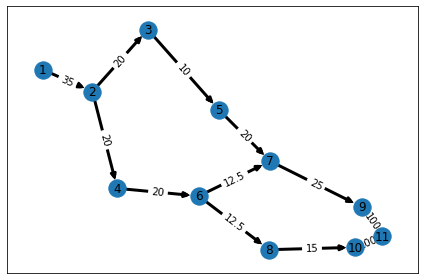

10

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

H = nx.DiGraph()
#H.add_weighted_edges_from([(1,2, 4.0), (2,3, 3.0), (2,4, 0)])

H.add_weighted_edges_from([(1,2,35), 
             (2,3,20), (2,4,20), 
             (3,5,10), (4,6,20), (5,7,20), 
             (6,7,12.5), (6,8,12.5), (7,9,25), (8,10,15),
             (9,11,100), (10,11,100)])

#nx.draw_networkx(H, with_labels=True)
pos = nx.spring_layout(H, seed=26)
#nx.draw_networkx_edge_labels(H, pos)

#pos = nx.spectral_layout(H)

nx.draw_networkx(H, pos)
edges_labels = nx.get_edge_attributes(H, "weight")
nx.draw_networkx_edges(H, pos, width=3)
nx.draw_networkx_edge_labels(H, pos, edges_labels)
plt.tight_layout()
plt.show()
#H.edges[1,2]['weight']
list(H.neighbors(2))  # out neighbors of node 2
H[3][5]['weight']

In [35]:
from pulp import LpMaximize, LpProblem, LpStatus, LpSum, LpVariable

model = LpProblem(name="canal network", sense=LpMaximize)

x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1,12)}

ModuleNotFoundError: No module named 'pulp'

In [28]:
from scipy.optimize import linprog

obj = [0]*12
lhs_eq = [[0]*12 for i in range(9)]

#
# unknown  |  represents connection
#   0         1 --> 2
#   1         2 --> 3
#   2         2 --> 4
#   3         3 --> 5
#   4         4 --> 6
#   5         5 --> 7
#   6         6 --> 7
#   7         6 --> 8
#   8         7 --> 9
#   9         8 --> 10
#   10        9 --> 11
#   11       10 --> 11
#

bnd = [(0,35), (0,20), (0,20), (0,10), (0,20), (0,20), (0,12.5), (0,12.5), 
       (0,25), (0,15), (0,100), (0,100)]

obj[0]=-1

lhs_eq[0][0]=1; lhs_eq[0][1]=-1; lhs_eq[0][2]=-1  # at node 2
lhs_eq[1][1]=1; lhs_eq[1][3]=-1    # at node 3
lhs_eq[2][2]=1; lhs_eq[2][4]=-1    # at node 4
lhs_eq[3][3]=1; lhs_eq[3][5]=-1    # at node 5
lhs_eq[4][4]=1; lhs_eq[4][6]=-1; lhs_eq[4][7]=-1  # at node 6
lhs_eq[5][5]=1; lhs_eq[5][6]=1; lhs_eq[5][8]=-1  # at node 7
lhs_eq[6][7]=1; lhs_eq[6][9]=-1      # at node 8
lhs_eq[7][8]=1; lhs_eq[7][10]=-1    # at node 9
lhs_eq[8][9]=1; lhs_eq[8][11]=-1    # at node 10

rhs_eq = [0, 0, 0, 0, 0, 0, 0, 0, 0]

opt = linprog(c=obj, A_eq = lhs_eq, b_eq = rhs_eq, bounds = bnd)

print(opt)

     con: array([ 8.06466005e-13, -1.77635684e-15, -1.77635684e-14,  0.00000000e+00,
        6.67910172e-13, -7.47846229e-13, -5.32907052e-15,  0.00000000e+00,
        3.55271368e-15])
     fun: -29.999999999964515
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([30.        , 10.        , 20.        , 10.        , 20.        ,
       10.        ,  9.85423576, 10.14576424, 19.85423576, 10.14576424,
       19.85423576, 10.14576424])


/mounts/bowie/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
/mounts/bowie/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.


In [25]:
#pip install mip --user
from mip import *

m = Model("canal network")
e1_2 = m.add_var(name="canal1_2", lb=0, ub=35)
e2_3 = m.add_var(name="canal2_3", lb=0, ub=20)
e2_4 = m.add_var(name="canal2_4", lb=0, ub=20)
e3_5 = m.add_var(name="canal3_5", lb=0, ub=10)
e4_6 = m.add_var(name="canal4_6", lb=0, ub=20)
e5_7 = m.add_var(name="canal5_7", lb=0, ub=20)
e6_7 = m.add_var(name="canal6_7", lb=0, ub=12.5)
e6_8 = m.add_var(name="canal6_8", lb=0, ub=12.5)
e7_9 = m.add_var(name="canal7_9", lb=0, ub=25)
e8_10 = m.add_var(name="canal8_10", lb=0, ub=15)
e9_11 = m.add_var(name="canal9_11", lb=0, ub=100)
e10_11 = m.add_var(name="canal10_11", lb=0, ub=100)

m += e1_2 == e2_3 + e2_4
m += e2_3 == e3_5
m += e2_4 == e4_6
m += e3_5 == e5_7
m += e4_6 == e6_7 + e6_8
m += e5_7 + e6_7 == e7_9
m += e7_9 == e9_11
m += e6_8 == e8_10
m += e8_10 == e10_11

m.objective = maximize(e1_2)

m.optimize()
print('Maximum flow rate=', m.objective_value,'\n')
print('Flow in each canal')
for e in m.vars:
    print('    {} = {}'.format(e.name, e.x))

Maximum flow rate= 30.0 

Flow in each canal
    canal1_2 = 30.0
    canal2_3 = 10.0
    canal2_4 = 20.0
    canal3_5 = 10.0
    canal4_6 = 20.0
    canal5_7 = 10.0
    canal6_7 = 7.5
    canal6_8 = 12.5
    canal7_9 = 17.5
    canal8_10 = 12.5
    canal9_11 = 17.5
    canal10_11 = 12.5
